In [216]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix
from prettytable import PrettyTable

import math

In [217]:
import pandas as pd

data = pd.read_excel("EvaluasiTingkatStress.xlsx")
df = pd.DataFrame(data.loc[:, ['Usia', 'Jenis Kelamin', 'Status', 'Bekerja', 'Jam Tidur Perhari', 'Kesibukan Perhari', 'Frequency of Anger', 'Lack of Control', 'Anxiety and Stress', 'Self-Efficacy', 'Perceived Control', 'Perceived Overwhelm', 'Feeling of Mastery', 'Cumulative Difficulty']])
# Calculate the total score and add it as a new column 'Score'
df['Score'] = df[['Frequency of Anger', 'Lack of Control', 'Anxiety and Stress', 'Self-Efficacy', 'Perceived Control', 'Perceived Overwhelm', 'Feeling of Mastery', 'Cumulative Difficulty']].sum(axis=1)
# Display the DataFrame with the total score
print(df)


     Usia Jenis Kelamin     Status Bekerja  Jam Tidur Perhari  \
0      19     Perempuan  Mahasiswa   Tidak                  1   
1      20     Laki-laki  Mahasiswa      Ya                  3   
2      22     Perempuan  Mahasiswa   Tidak                  3   
3      18     Perempuan  Mahasiswa      Ya                  3   
4      18     Perempuan  Mahasiswa   Tidak                  3   
..    ...           ...        ...     ...                ...   
151    18     Perempuan  Mahasiswa   Tidak                  8   
152    24     Perempuan  Mahasiswa   Tidak                  8   
153    24     Perempuan  Mahasiswa   Tidak                  8   
154    15     Laki-laki    Pelajar   Tidak                 10   
155    20     Perempuan  Mahasiswa   Tidak                 10   

     Kesibukan Perhari  Frequency of Anger  Lack of Control  \
0                    8                   4                3   
1                   15                   5                5   
2                    8        

In [218]:
# Mendeteksi missing value pada variabel
if df.isnull().values.any():
    print("\n---Berikut nilai-nilai yang hilang pada data:---")
    print("")
    print(df[df.isnull().any(axis=1)])
else:
    print("\n---Tidak terdapat missing value pada data---")

# Mengganti missing value dengan mean
if df.isnull().values.any():
    df = df.fillna(df.mean())
    print("\n---Berikut hasil missing value pada data yang sudah diperbaiki:---")
    print("")
    print(df)
else:
    print("")



---Tidak terdapat missing value pada data---



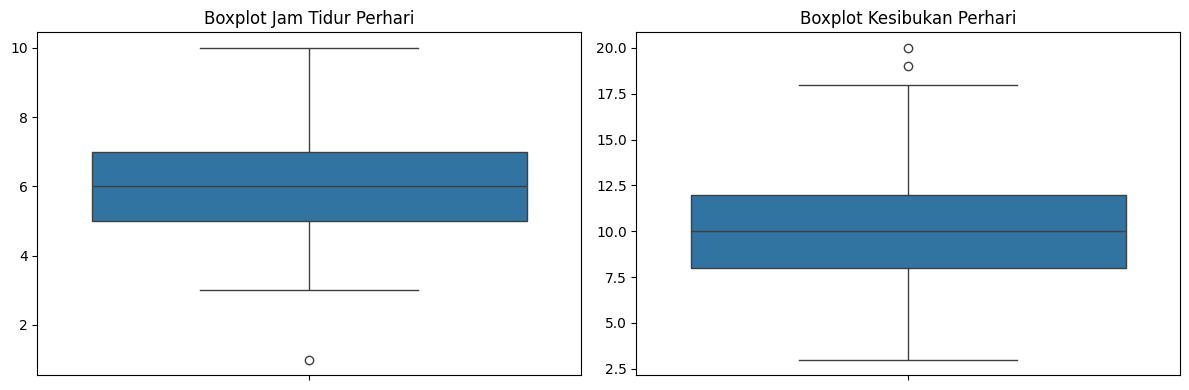

Outliers for Jam Tidur Perhari:
[1]
Outliers for Kesibukan Perhari:
[20 19]


In [219]:
# Variabel input yang akan divisualisasikan
vars_to_plot = ['Jam Tidur Perhari', 'Kesibukan Perhari']

# Membuat satu gambar yang berisi boxplot untuk masing-masing variabel input
fig, axes = plt.subplots(1, len(vars_to_plot), figsize=(12, 4))
fig.subplots_adjust(wspace=0.5)

outliers_data = {}  # Dictionary untuk menyimpan nilai outlier

for i, var in enumerate(vars_to_plot):
    ax = axes[i]
    sns.boxplot(y=df[var], ax=ax)
    ax.set_title(f'Boxplot {var}')
    ax.set_ylabel('')

    # Menghitung nilai outlier
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr

    outliers = df[(df[var] > upper_bound) | (df[var] < lower_bound)][var]
    
    # Menyimpan nilai outlier ke dalam dictionary
    outliers_data[var] = outliers

# Mengatur tata letak subplot
plt.tight_layout()
plt.show()

# Mencetak nilai outlier
for var, outliers in outliers_data.items():
    print(f'Outliers for {var}:')
    print(outliers.values)  # Mencetak nilai outlier dari dictionary

Handling outliers for Jam Tidur Perhari with mean value.
[1]
Handling outliers for Kesibukan Perhari with mean value.
[20 19]


C:\Users\Airlangga\AppData\Local\Temp\ipykernel_42220\2356428290.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '5.846153846153846' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[var].isin(outliers), var] = mean_value
C:\Users\Airlangga\AppData\Local\Temp\ipykernel_42220\2356428290.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '10.307692307692308' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[var].isin(outliers), var] = mean_value


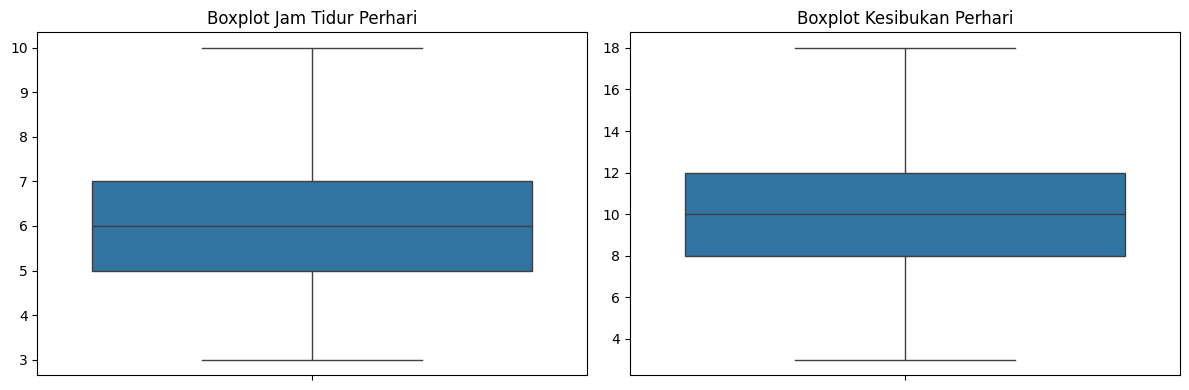

In [220]:
# Mengganti outlier dengan nilai mean
for var, outliers in outliers_data.items():
    if not outliers.empty:
        # Hitung nilai mean variabel
        mean_value = df[var].mean()
        
        # Ganti outlier dengan nilai mean
        df.loc[df[var].isin(outliers), var] = mean_value

# Sekarang, outlier telah diganti dengan nilai mean. Anda dapat mengeceknya dengan kode berikut:
for var, outliers in outliers_data.items():
    if not outliers.empty:
        print(f'Handling outliers for {var} with mean value.')
        print(outliers.values)  # Mencetak nilai outlier yang telah diganti dengan nilai mean

# Membuat satu gambar yang berisi boxplot untuk masing-masing variabel input
fig, axes = plt.subplots(1, len(vars_to_plot), figsize=(12, 4))
fig.subplots_adjust(wspace=0.5)

for i, var in enumerate(vars_to_plot):
    ax = axes[i]
    sns.boxplot(y=df[var], ax=ax)
    ax.set_title(f'Boxplot {var}')
    ax.set_ylabel('')

# Mengatur tata letak subplot
plt.tight_layout()
plt.show()

In [221]:
df['Jenis Kelamin'].replace({'Laki-laki':0, 'Perempuan':1}, inplace=True)
df['Status'].replace({'Pelajar':0,'Mahasiswa':1,'Lainnya':2}, inplace=True)
df['Bekerja'].replace({'Tidak':0,'Ya':1}, inplace=True)

In [222]:
binary_data = df[['Usia', 'Jenis Kelamin', 'Status', 'Bekerja', 'Jam Tidur Perhari','Kesibukan Perhari']]
binary_data 
Score = df['Score']

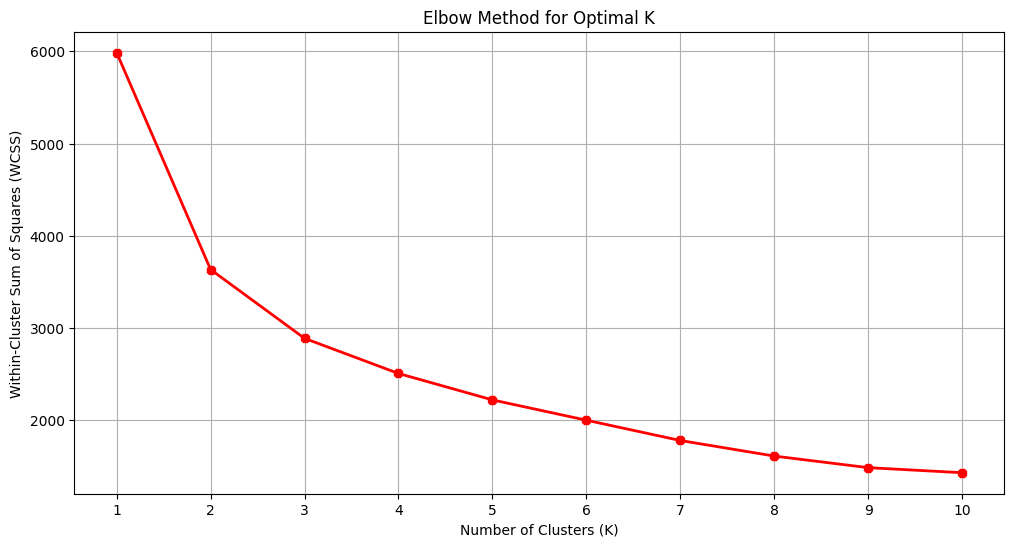

In [223]:
# Combine the features into a single array
Xstack = np.column_stack((Score.values, binary_data.values))

# Use the Elbow Method to find the optimal number of clusters (k)
wcss = []
for k in range(1, 11):
    k_means = KMeans(n_clusters=k, init="k-means++", n_init=10,random_state=100)
    k_means.fit(Xstack)
    wcss.append(k_means.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("Number of Clusters (K)")
plt.xticks(np.arange(1, 11, 1))
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.show()

In [224]:
# Based on the Elbow Method, let's use k=3 for clustering
kmeanModel = KMeans(n_clusters=3, init="k-means++", n_init=10,random_state=100)
kmeanModel.fit(Xstack)

# Evaluate clustering using silhouette score
silhouette_avg = silhouette_score(Xstack, kmeanModel.labels_)
print("Silhouette Score:", silhouette_avg)

# Add the cluster labels to your DataFrame or data
df['Cluster'] = kmeanModel.labels_

# Display the resulting DataFrame with cluster labels
print(df)

Silhouette Score: 0.29226397926658165
     Usia  Jenis Kelamin  Status  Bekerja  Jam Tidur Perhari  \
0      19              1       1        0           5.846154   
1      20              0       1        1           3.000000   
2      22              1       1        0           3.000000   
3      18              1       1        1           3.000000   
4      18              1       1        0           3.000000   
..    ...            ...     ...      ...                ...   
151    18              1       1        0           8.000000   
152    24              1       1        0           8.000000   
153    24              1       1        0           8.000000   
154    15              0       0        0          10.000000   
155    20              1       1        0          10.000000   

     Kesibukan Perhari  Frequency of Anger  Lack of Control  \
0                  8.0                   4                3   
1                 15.0                   5                5   
2   

In [225]:
# Analyze cluster characteristics
cluster_analysis = df.groupby('Cluster').mean()
print("\nCluster Analysis:")
print(cluster_analysis)


Cluster Analysis:
              Usia  Jenis Kelamin    Status   Bekerja  Jam Tidur Perhari  \
Cluster                                                                    
0        20.000000       0.593750  1.015625  0.156250           5.968750   
1        19.677966       0.694915  1.000000  0.101695           5.912647   
2        19.757576       0.666667  1.030303  0.181818           5.636364   

         Kesibukan Perhari  Frequency of Anger  Lack of Control  \
Cluster                                                           
0                 9.536058            3.187500         2.921875   
1                 8.683181            4.135593         4.220339   
2                14.151515            4.060606         3.878788   

         Anxiety and Stress  Self-Efficacy  Perceived Control  \
Cluster                                                         
0                  3.187500       2.281250           2.609375   
1                  4.406780       3.288136           3.847458   
2   

In [226]:
df

,Usia,Jenis Kelamin,Status,Bekerja,Jam Tidur Perhari,Kesibukan Perhari,Frequency of Anger,Lack of Control,Anxiety and Stress,Self-Efficacy,Perceived Control,Perceived Overwhelm,Feeling of Mastery,Cumulative Difficulty,Score,Cluster
0,19,1,1,0,5.846154,8.0,4,3,5,4,3,5,5,5,34,1
1,20,0,1,1,3.000000,15.0,5,5,5,2,3,2,5,2,29,2
2,22,1,1,0,3.000000,8.0,5,5,5,4,4,5,5,5,38,1
3,18,1,1,1,3.000000,10.0,4,3,5,4,4,4,5,4,33,1
4,18,1,1,0,3.000000,4.0,3,5,5,4,5,5,5,5,37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,18,1,1,0,8.000000,8.0,1,3,3,3,3,3,4,2,22,0
152,24,1,1,0,8.000000,4.0,3,2,4,2,3,2,3,3,22,0
153,24,1,1,0,8.000000,15.0,5,4,3,2,4,4,2,5,29,2
154,15,0,0,0,10.000000,5.0,3,5,4,4,4,3,4,4,31,1


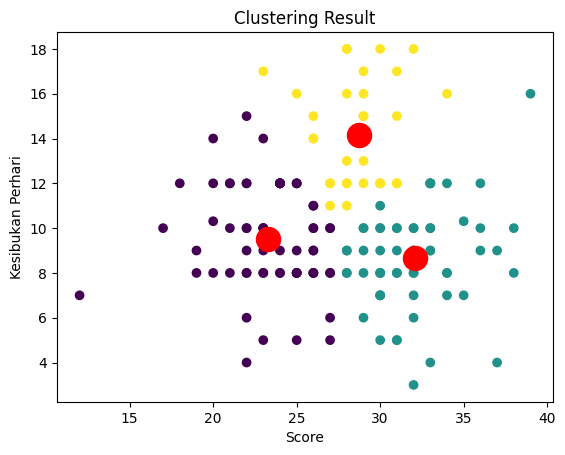

In [227]:
# Visualize clustering results
plt.scatter(Xstack[:, 0], Xstack[:, 6], c=kmeanModel.labels_, cmap='viridis')
plt.scatter(kmeanModel.cluster_centers_[:, 0], kmeanModel.cluster_centers_[:, 6], s=300, c='red')
plt.title('Clustering Result')
plt.xlabel('Score')
plt.ylabel('Kesibukan Perhari')
plt.show()

In [228]:
# Menambahkan label Cluster berdasarkan nilai rata-rata variabel tingkat stres
df['Tingkat Stress'] = df['Cluster'].map({
    0: 'Low Stress',
    1: 'Moderated Stress',
    2: 'High Perceived Stress'
})

# Mencetak jumlah data di setiap klaster
print(df['Tingkat Stress'].value_counts())

# Menampilkan tabel hasil clustering dengan label Cluster
dataNama = data['Nama atau Inisial']
result_table = pd.merge(dataNama, df, left_index=True, right_index=True)
# Menampilkan hasil sebagai tabel yang bagus
table = PrettyTable()
table.field_names = result_table.columns
for row in result_table.itertuples(index=False):
    table.add_row(row)

print(table)

Tingkat Stress
Low Stress               64
Moderated Stress         59
High Perceived Stress    33
Name: count, dtype: int64
+-------------------------------+------+---------------+--------+---------+-------------------+--------------------+--------------------+-----------------+--------------------+---------------+-------------------+---------------------+--------------------+-----------------------+-------+---------+-----------------------+
|       Nama atau Inisial       | Usia | Jenis Kelamin | Status | Bekerja | Jam Tidur Perhari | Kesibukan Perhari  | Frequency of Anger | Lack of Control | Anxiety and Stress | Self-Efficacy | Perceived Control | Perceived Overwhelm | Feeling of Mastery | Cumulative Difficulty | Score | Cluster |     Tingkat Stress    |
+-------------------------------+------+---------------+--------+---------+-------------------+--------------------+--------------------+-----------------+--------------------+---------------+-------------------+-------------------

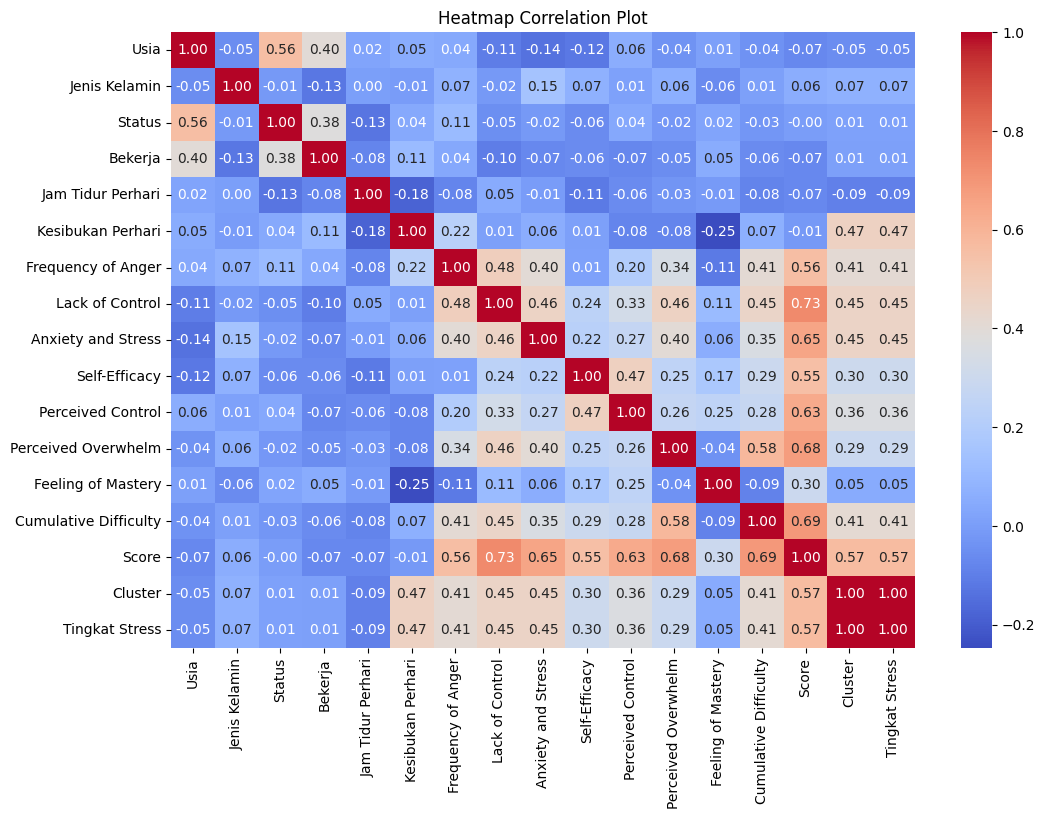

In [229]:
df['Tingkat Stress'].replace({'Low Stress':1, 'Moderated Stress':2, 'High Perceived Stress':3,}, inplace=True)
# Menghitung matriks korelasi
corr_matrix = df.corr()

# Membuat Heatmap Correlation Plot
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Correlation Plot')
plt.show()

In [230]:
y = df["Tingkat Stress"]
X = df.drop(["Usia","Jenis Kelamin","Status","Bekerja","Jam Tidur Perhari","Feeling of Mastery","Score","Cluster","Tingkat Stress",], axis = 1)

In [231]:
X

,Kesibukan Perhari,Frequency of Anger,Lack of Control,Anxiety and Stress,Self-Efficacy,Perceived Control,Perceived Overwhelm,Cumulative Difficulty
0,8.0,4,3,5,4,3,5,5
1,15.0,5,5,5,2,3,2,2
2,8.0,5,5,5,4,4,5,5
3,10.0,4,3,5,4,4,4,4
4,4.0,3,5,5,4,5,5,5
...,...,...,...,...,...,...,...,...
151,8.0,1,3,3,3,3,3,2
152,4.0,3,2,4,2,3,2,3
153,15.0,5,4,3,2,4,4,5
154,5.0,3,5,4,4,4,3,4


In [232]:
df['Tingkat Stress'].replace({1:'Low Stress', 2:'Stress Moderated', 3:'High Perceived Stress'}, inplace=True)

In [233]:
# Split into test and training sets
test_size = 0.2
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=100)

In [234]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


====== Decision Tree ======
Precision (Decision Tree): 0.6853966346153846
Recall (Decision Tree): 0.6875
F1 Score (Decision Tree): 0.6854411764705881
Test Accuracy (Decision Tree): 0.6875
=====Confusion Matrix=====


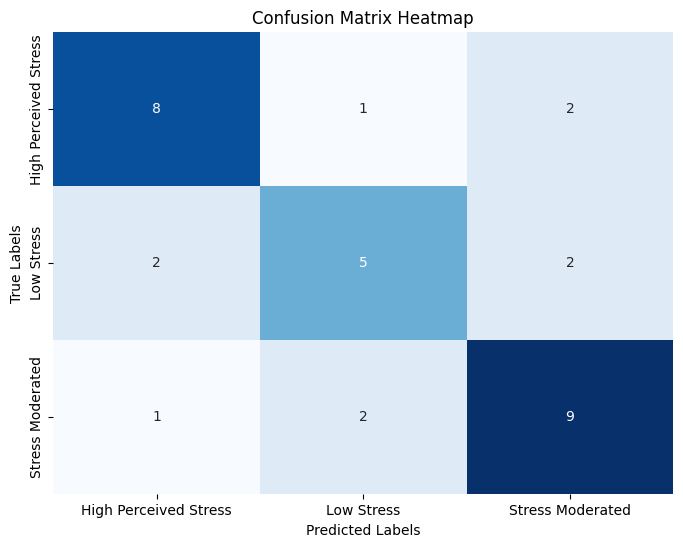

In [235]:
# Decision Tree
model_dt = DecisionTreeClassifier(criterion="entropy", max_depth=3)
model_dt.fit(X_train, y_train)
predictions_test_dt = model_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, predictions_test_dt)
precision_dt = precision_score(y_test, predictions_test_dt, average='weighted', zero_division=1)
recall_dt = recall_score(y_test, predictions_test_dt, average='weighted')
f1_dt = f1_score(y_test, predictions_test_dt, average='weighted')
print("\n====== Decision Tree ======")
print(f"Precision (Decision Tree): {precision_dt}")
print(f"Recall (Decision Tree): {recall_dt}")
print(f"F1 Score (Decision Tree): {f1_dt}")
print(f"Test Accuracy (Decision Tree): {accuracy_dt}")
print("=====Confusion Matrix=====")
cm_dt = confusion_matrix(y_test, predictions_test_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=model_dt.classes_, yticklabels=model_dt.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

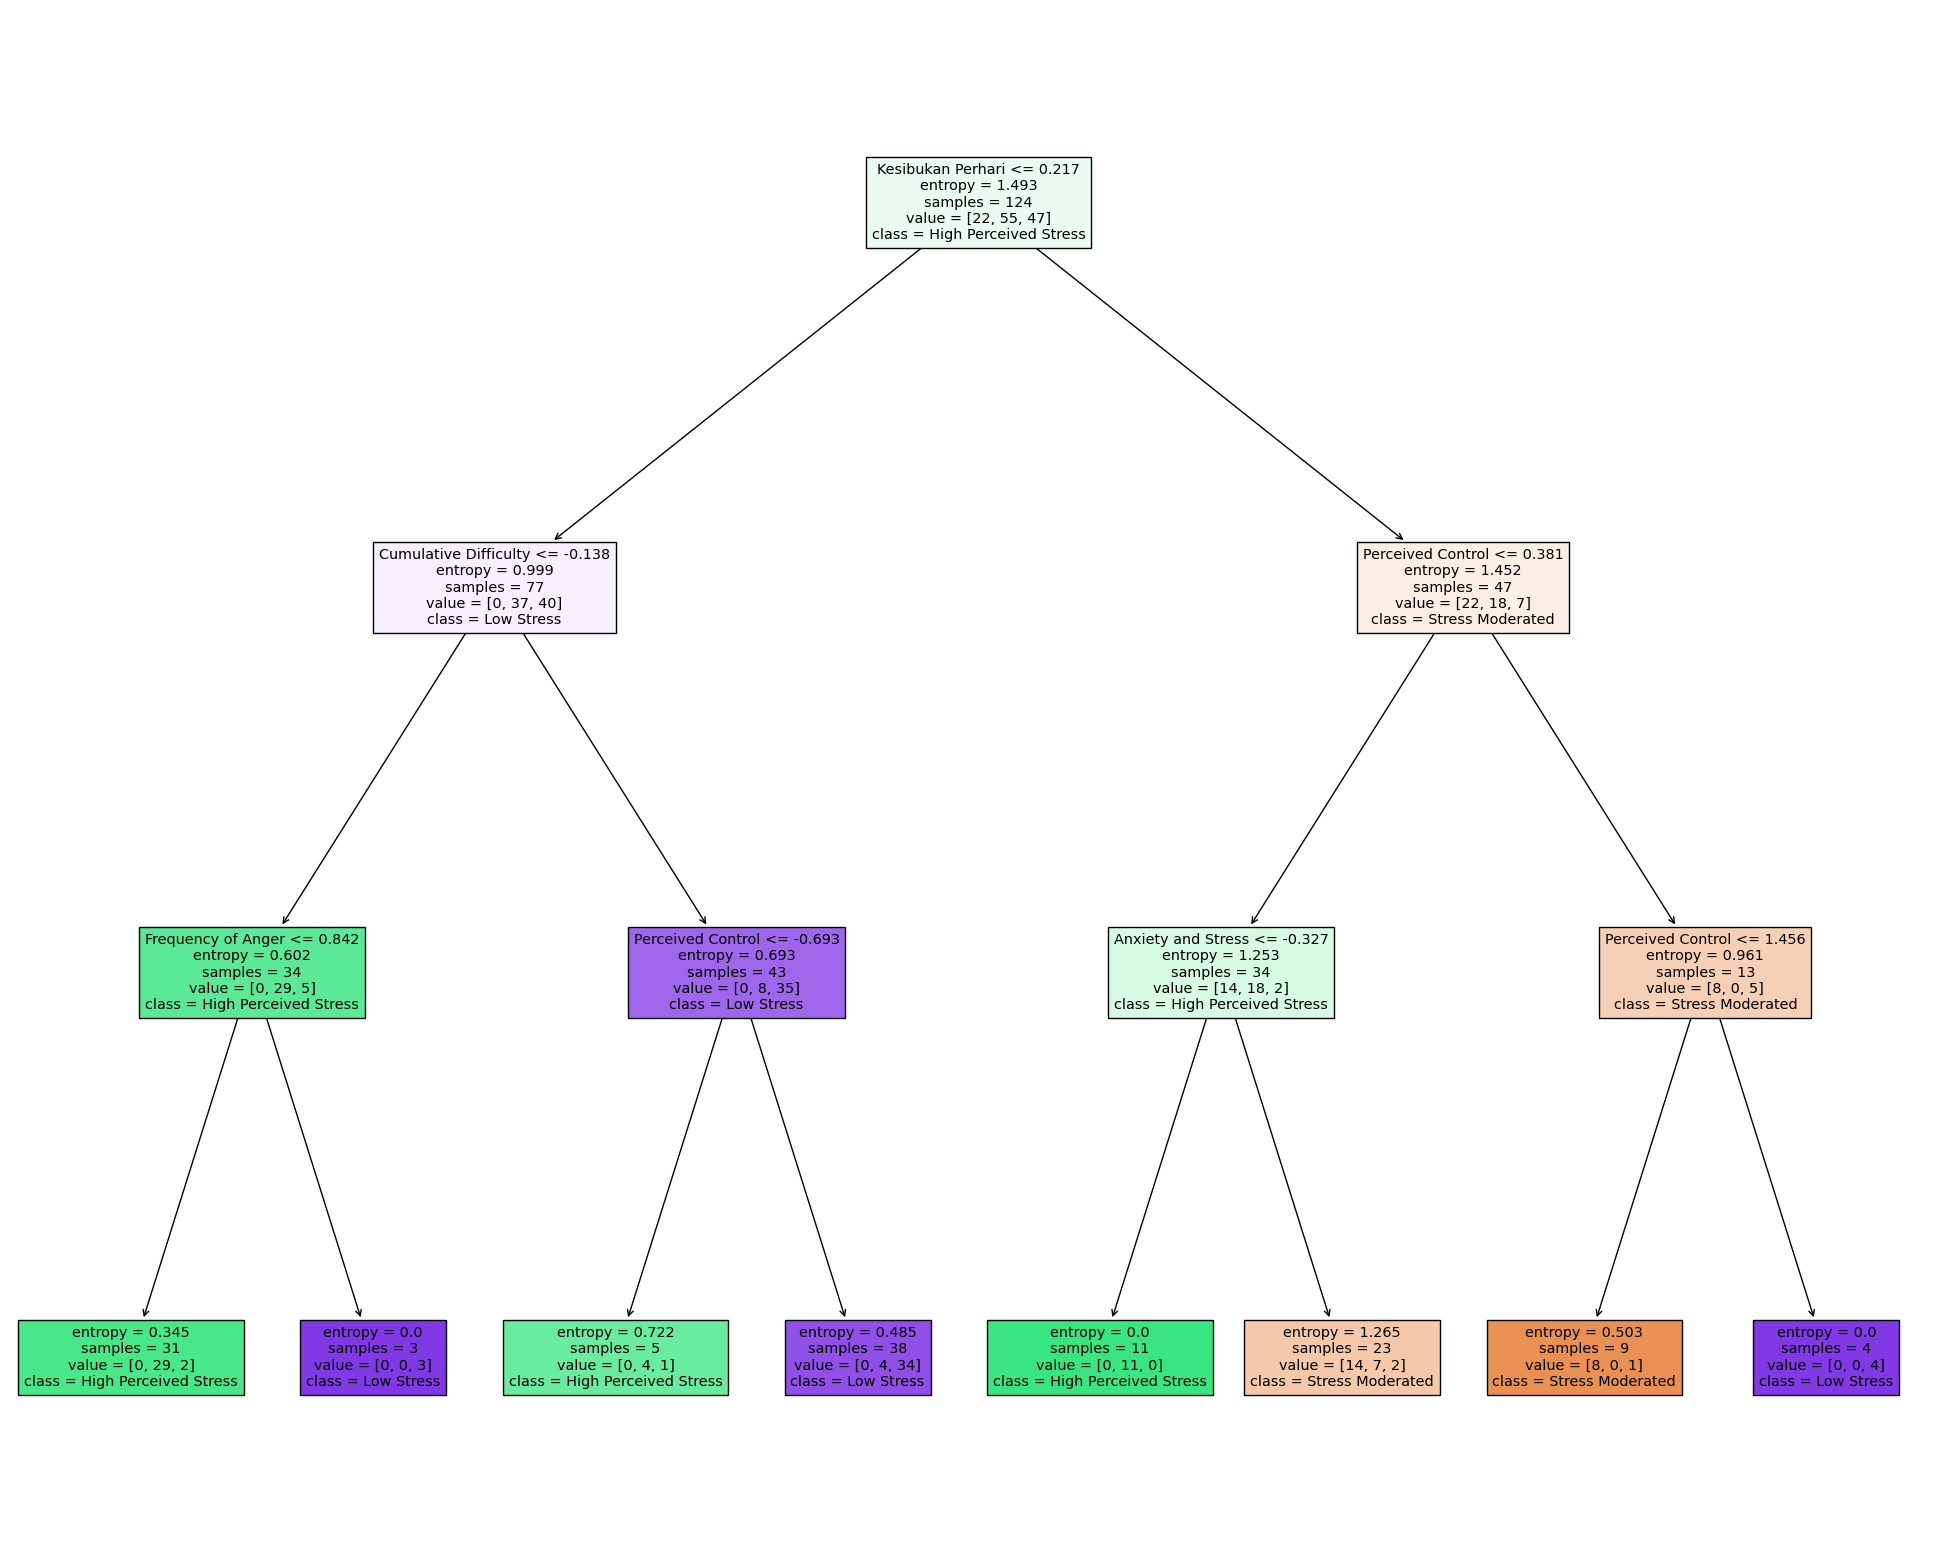

In [236]:
from sklearn import tree
y_str = list(map(str, y.unique()))

fig = plt.figure(figsize=(25, 20))
tree.plot_tree(model_dt, feature_names=X.columns.tolist(), class_names=y_str, filled=True)
plt.show()


====== Random Forest ======
Precision (Random Forest): 0.8061079545454546
Recall (Random Forest): 0.75
F1 Score (Random Forest): 0.7344866071428571
Test Accuracy (Random Forest): 0.75
=====Confusion Matrix=====


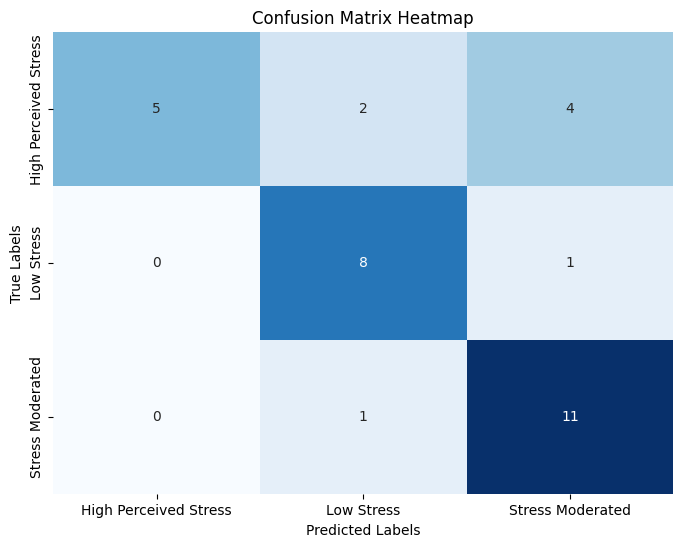

In [237]:
# Random Forest
model_rf = RandomForestClassifier(max_depth= 10, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 100, random_state=100)
model_rf.fit(X_train, y_train)
predictions_test_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, predictions_test_rf)
precision_rf = precision_score(y_test, predictions_test_rf, average='weighted', zero_division=1)
recall_rf = recall_score(y_test, predictions_test_rf, average='weighted')
f1_rf = f1_score(y_test, predictions_test_rf, average='weighted')
print("\n====== Random Forest ======")
print(f"Precision (Random Forest): {precision_rf}")
print(f"Recall (Random Forest): {recall_rf}")
print(f"F1 Score (Random Forest): {f1_rf}")
print(f"Test Accuracy (Random Forest): {accuracy_rf}")
print("=====Confusion Matrix=====")
cm_rf = confusion_matrix(y_test, predictions_test_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=model_rf.classes_, yticklabels=model_rf.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

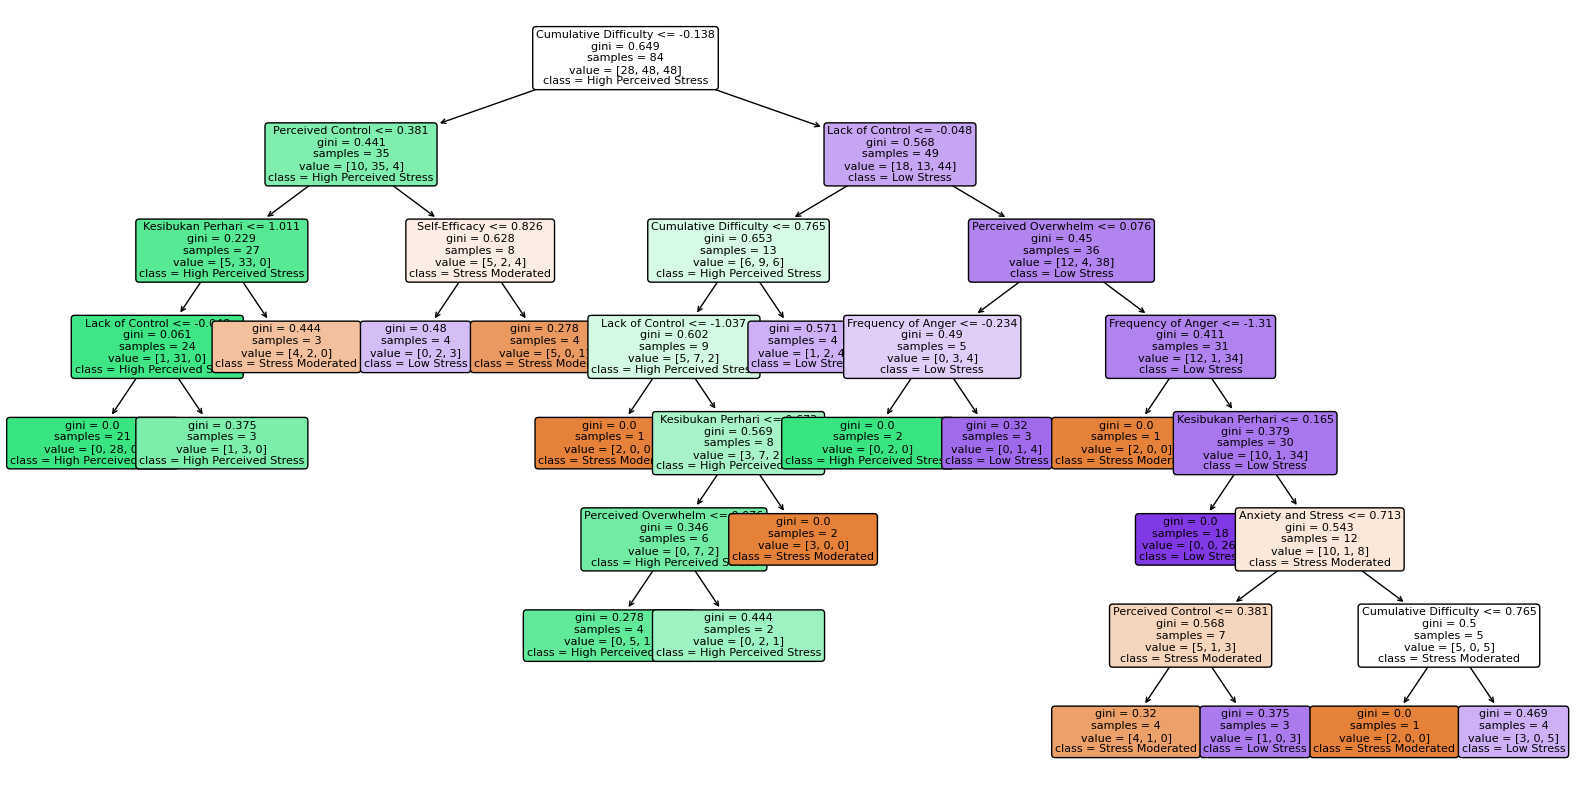

In [238]:
from sklearn.tree import plot_tree
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model_rf.estimators_[0], feature_names=X.columns.tolist(), class_names=y_str, filled=True, rounded=True, fontsize=8)
plt.show()

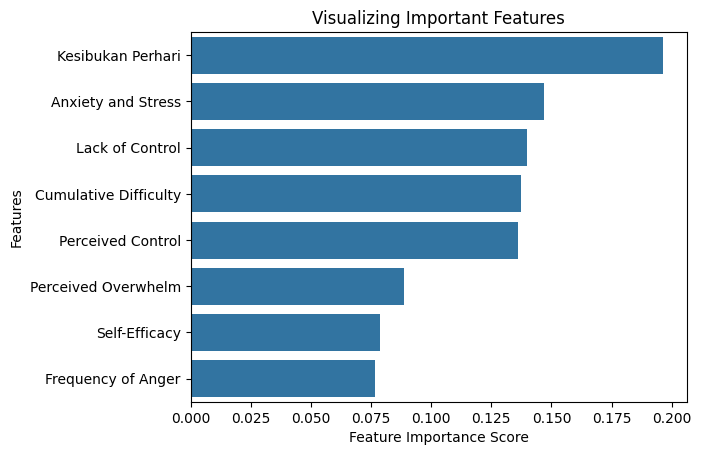

In [239]:
feature_scores = pd.Series(model_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()


====== K Neighbors Classifier ======
Precision (K Neighbors Classifier): 0.7218137254901961
Recall (K Neighbors Classifier): 0.71875
F1 Score (K Neighbors Classifier): 0.6962474645030425
Test Accuracy (K Neighbors Classifier): 0.71875
=====Confusion Matrix=====


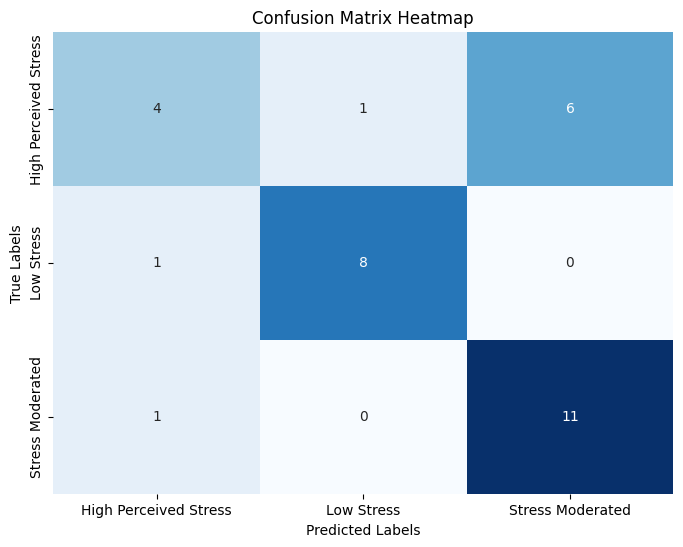

In [240]:
# K Neighbors Classifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
predictions_test_knn = model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, predictions_test_knn)
precision_knn = precision_score(y_test, predictions_test_knn, average='weighted', zero_division=1)
recall_knn = recall_score(y_test, predictions_test_knn, average='weighted')
f1_knn = f1_score(y_test, predictions_test_knn, average='weighted')
print("\n====== K Neighbors Classifier ======")
print(f"Precision (K Neighbors Classifier): {precision_knn}")
print(f"Recall (K Neighbors Classifier): {recall_knn}")
print(f"F1 Score (K Neighbors Classifier): {f1_knn}")
print(f"Test Accuracy (K Neighbors Classifier): {accuracy_knn}")
print("=====Confusion Matrix=====")
cm_knn = confusion_matrix(y_test, predictions_test_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=model_knn.classes_, yticklabels=model_knn.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


====== Support Vector Machine ======
Precision (Support Vector Machine): 0.8258928571428572
Recall (Support Vector Machine): 0.8125
F1 Score (Support Vector Machine): 0.800595238095238
Test Accuracy (Support Vector Machine): 0.8125
=====Confusion Matrix=====


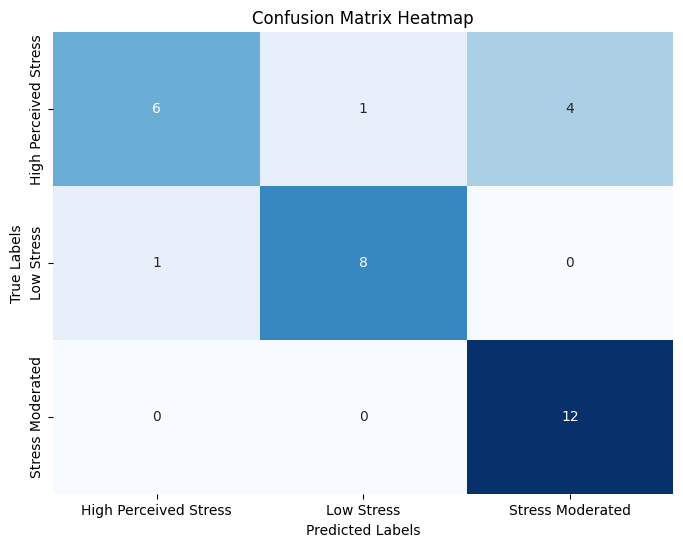

In [241]:
# Support Vector Machine
model_svm = SVC()
model_svm.fit(X_train, y_train)
predictions_test_svm = model_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, predictions_test_svm)
precision_svm = precision_score(y_test, predictions_test_svm, average='weighted', zero_division=1)
recall_svm = recall_score(y_test, predictions_test_svm, average='weighted')
f1_svm = f1_score(y_test, predictions_test_svm, average='weighted')
print("\n====== Support Vector Machine ======")
print(f"Precision (Support Vector Machine): {precision_svm}")
print(f"Recall (Support Vector Machine): {recall_svm}")
print(f"F1 Score (Support Vector Machine): {f1_svm}")
print(f"Test Accuracy (Support Vector Machine): {accuracy_svm}")
print("=====Confusion Matrix=====")
cm_svm = confusion_matrix(y_test, predictions_test_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=model_svm.classes_, yticklabels=model_svm.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


====== Logistic Regression ======
Precision (Logistic Regression): 0.9464285714285714
Recall (Logistic Regression): 0.9375
F1 Score (Logistic Regression): 0.9367788461538461
Test Accuracy (Logistic Regression): 0.9375
=====Confusion Matrix=====


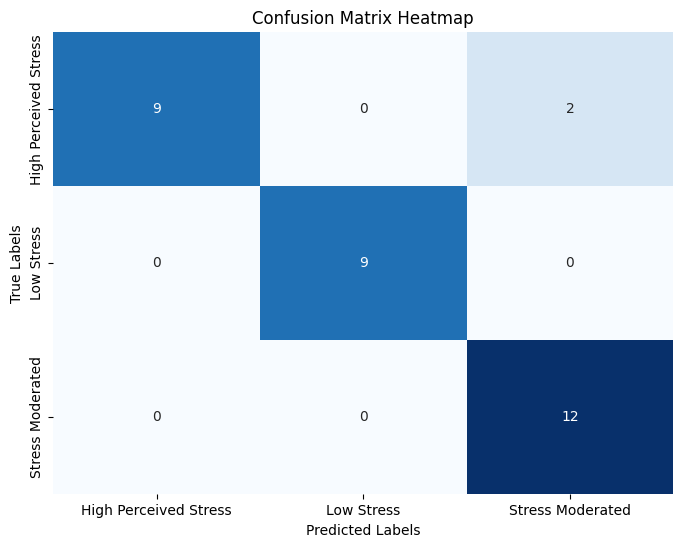

In [242]:
# Logistic Regression
model_logreg = LogisticRegression(max_iter=1000)
model_logreg.fit(X_train, y_train)
predictions_test_logreg = model_logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, predictions_test_logreg)
precision_logreg = precision_score(y_test, predictions_test_logreg, average='weighted', zero_division=1)
recall_logreg = recall_score(y_test, predictions_test_logreg, average='weighted')
f1_logreg = f1_score(y_test, predictions_test_logreg, average='weighted')
print("\n====== Logistic Regression ======")
print(f"Precision (Logistic Regression): {precision_logreg}")
print(f"Recall (Logistic Regression): {recall_logreg}")
print(f"F1 Score (Logistic Regression): {f1_logreg}")
print(f"Test Accuracy (Logistic Regression): {accuracy_logreg}")
print("=====Confusion Matrix=====")
cm_logreg = confusion_matrix(y_test, predictions_test_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=model_logreg.classes_, yticklabels=model_logreg.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [243]:
from sklearn.model_selection import cross_val_score,cross_validate
# Perform cross-validation with 'accuracy' as the scoring metric
cv_score = cross_val_score(model_logreg, X, y, scoring='accuracy', cv=5)

# Display the mean cross-validated accuracy
print("Mean Accuracy:", cv_score.mean())

Mean Accuracy: 0.9419354838709678



====== Naive Bayes ======
Precision (Naive Bayes): 0.86875
Recall (Naive Bayes): 0.84375
F1 Score (Naive Bayes): 0.8375365497076024
Test Accuracy (Naive Bayes): 0.84375
=====Confusion Matrix=====


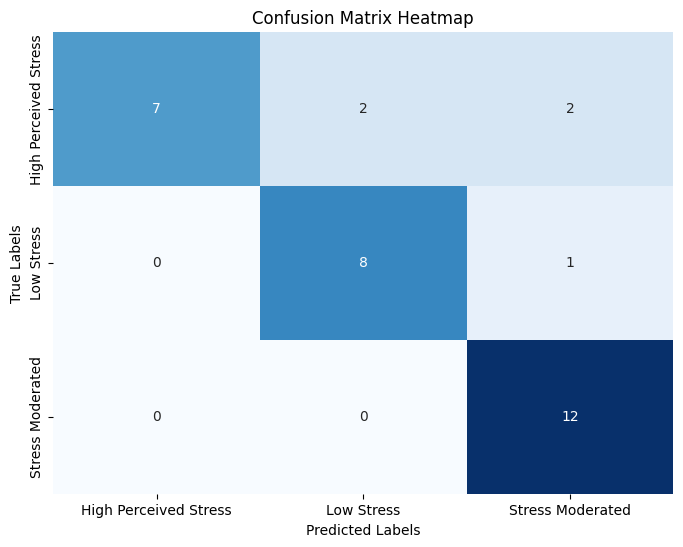

In [244]:
# Naive Bayes
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
predictions_test_nb = model_nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, predictions_test_nb)
precision_nb = precision_score(y_test, predictions_test_nb, average='weighted', zero_division=1)
recall_nb = recall_score(y_test, predictions_test_nb, average='weighted')
f1_nb = f1_score(y_test, predictions_test_nb, average='weighted')
print("\n====== Naive Bayes ======")
print(f"Precision (Naive Bayes): {precision_nb}")
print(f"Recall (Naive Bayes): {recall_nb}")
print(f"F1 Score (Naive Bayes): {f1_nb}")
print(f"Test Accuracy (Naive Bayes): {accuracy_nb}")
print("=====Confusion Matrix=====")
cm_nb = confusion_matrix(y_test, predictions_test_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=model_nb.classes_, yticklabels=model_nb.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [245]:
# Find and print the model with the highest accuracy
model_metrics = {
    "Decision Tree": {"Accuracy": accuracy_dt, "Precision": precision_dt, "Recall": recall_dt, "F1": f1_dt},
    "Random Forest": {"Accuracy": accuracy_rf, "Precision": precision_rf, "Recall": recall_rf, "F1": f1_rf},
    "K-Nearest Neighbors": {"Accuracy": accuracy_knn, "Precision": precision_knn, "Recall": recall_knn, "F1": f1_knn},
    "Support Vector Machine": {"Accuracy": accuracy_svm, "Precision": precision_svm, "Recall": recall_svm, "F1": f1_svm},
    "Logistic Regression": {"Accuracy": accuracy_logreg, "Precision": precision_logreg, "Recall": recall_logreg, "F1": f1_logreg},
    "Naive Bayes": {"Accuracy": accuracy_nb, "Precision": precision_nb, "Recall": recall_nb, "F1": f1_nb},
}

best_model = max(model_metrics, key=lambda k: model_metrics[k]["Accuracy"])
print(f"\nThe model with the highest accuracy is: {best_model} with accuracy {model_metrics[best_model]['Accuracy']}")


The model with the highest accuracy is: Logistic Regression with accuracy 0.9375


MODEL KLASIFIKASI LOGISTIC REGRESSION